## <center>**PROJECT: ```Animal Classifcation using Traditional ML & Simple MLP Neural Network before and after Feature Extraction uisng HOG, SIFT, ORB```**</center>

## **Imports**

In [1]:
import os
import cv2
import copy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## **Dataset Loading**

In [2]:
# current directory
cwd = os.getcwd()
print(cwd)

e:\Projects\AI-ML\Vision\Animal Classification Before and After Feature Extraction


In [3]:
# path to images
path = cwd+'/animals/'

In [4]:
# animal categories
categories = ['dogs', 'pandas', 'cats']

### ```Displaying Images```

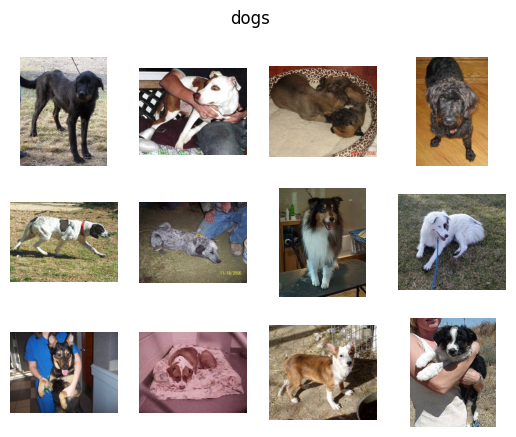

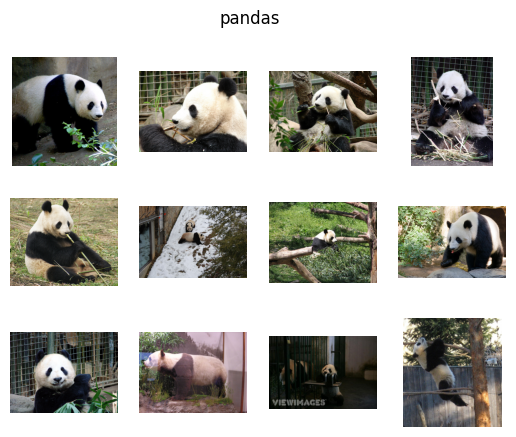

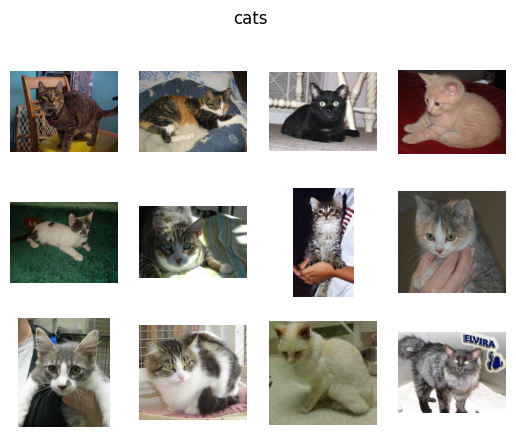

In [5]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()


### ```Displaying Max and Min Height and width of Images of each class```

In [6]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
pandas  => height min :  87 width min :  78
pandas  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


## **Preprocess data and label inputs**

In [7]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

### ```Shuffling the Images' paths```

In [8]:
import random
random.shuffle(imagePaths)
print(imagePaths[:10])

[['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/pandas/panda_00809.jpg', 1], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00671.jpg', 2], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/pandas/panda_00610.jpg', 1], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/pandas/panda_00467.jpg', 1], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00825.jpg', 2], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00081.jpg', 2], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/pandas/panda_00742.jpg', 1], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00692.jpg', 2], ['e

### ```Reading Images and their labels```

In [9]:
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [10]:
# Note that float images are restricted to the range 0 to 1 even though the data type itself can exceed this range; all integer dtypes, on the other hand, 
# have pixel intensities that can span the entire data type range.

# Scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float") 
# mean_image = np.mean(data, axis=0)
# data -= mean_image

labels = np.array(labels)

### ```Applying One Hot Vector```

In [11]:
# Original data
targets = np.array(['dogs', 'pandas', 'cats'])
# One-hot encoding
onehotEnc = preprocessing.OneHotEncoder(sparse=False, dtype=int)
targets_trans = onehotEnc.fit_transform(targets.reshape(-1, 1))
# Print the results
print("The original data")
print(targets)
print("The transform data using OneHotEncoder")
print(targets_trans)

The original data
['dogs' 'pandas' 'cats']
The transform data using OneHotEncoder
[[0 1 0]
 [0 0 1]
 [1 0 0]]


e:\Projects\AI-ML\Vision\Animal Classification Before and After Feature Extraction\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# targets = np.array(['dogs', 'pandas', 'cats'])
# labelEnc = preprocessing.LabelEncoder()
# new_target = labelEnc.fit_transform(targets)
# onehotEnc = preprocessing.OneHotEncoder()
# onehotEnc.fit(new_target.reshape(-1, 1))
# targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
# print("The original data")
# print(targets)
# print("The transform data using OneHotEncoder")
# print(targets_trans.toarray())

In [13]:
print(data.shape, labels.shape)

(3000, 32, 55, 3) (3000,)


### ```Displaying Images after resizing```

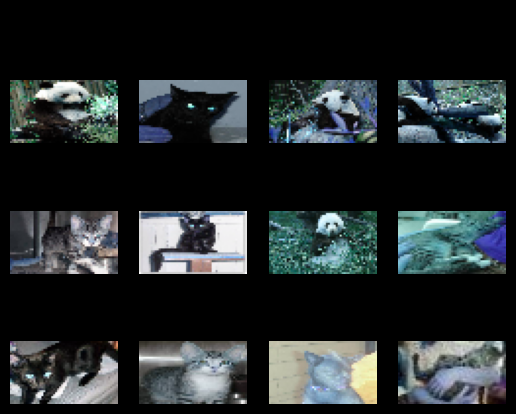

In [14]:
# plt.subplot(nb_rows, nb_cols, position)
# Let's check everything is ok
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:black')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [15]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [16]:
trainX

array([[[[0.48235294, 0.4745098 , 0.43137255],
         [0.49803922, 0.49019608, 0.44705882],
         [0.49411765, 0.48627451, 0.44313725],
         ...,
         [0.17254902, 0.29019608, 0.25098039],
         [0.50196078, 0.35686275, 0.22352941],
         [0.42352941, 0.29019608, 0.12941176]],

        [[0.49411765, 0.48627451, 0.44313725],
         [0.50980392, 0.50196078, 0.45882353],
         [0.50196078, 0.49411765, 0.45098039],
         ...,
         [0.49803922, 0.37647059, 0.16470588],
         [0.49411765, 0.38039216, 0.16470588],
         [0.44705882, 0.21960784, 0.05490196]],

        [[0.50588235, 0.49803922, 0.45490196],
         [0.50980392, 0.50196078, 0.45882353],
         [0.53333333, 0.52941176, 0.4745098 ],
         ...,
         [0.59215686, 0.4       , 0.22352941],
         [0.45098039, 0.28627451, 0.12156863],
         [0.54117647, 0.25490196, 0.06666667]],

        ...,

        [[0.03529412, 0.05490196, 0.10588235],
         [0.        , 0.03137255, 0.06666667]

In [17]:
# Preprocess class labels
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400,)
(600,)


### ```Flattening the 3d array to 2d to feed to ML models that works better on 2d```

In [18]:
trainX= np.reshape(trainX, (trainX.shape[0], -1))
testX = np.reshape(testX, (testX.shape[0], -1))

In [19]:
trainX

array([[0.48235294, 0.4745098 , 0.43137255, ..., 0.70196078, 0.74509804,
        0.7372549 ],
       [0.17254902, 0.2745098 , 0.34509804, ..., 0.13333333, 0.20784314,
        0.34509804],
       [0.73333333, 0.69411765, 0.6627451 , ..., 0.75294118, 0.57647059,
        0.47058824],
       ...,
       [0.05490196, 0.03137255, 0.07058824, ..., 0.29411765, 0.43137255,
        0.2745098 ],
       [0.4745098 , 0.38431373, 0.18039216, ..., 0.45098039, 0.43137255,
        0.42352941],
       [0.36078431, 0.40784314, 0.41176471, ..., 0.43921569, 0.56078431,
        0.65882353]])

In [20]:
# Preprocess class labels
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 5280)
(600, 5280)
(2400,)
(600,)


## **Model Implementation Before any Feature Extractor Algorithm**

### ```Applying Simple SVM without Optimization First```

In [21]:
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(trainX, trainY)

NuSVC()

In [22]:
results = clf.predict(testX)

In [23]:
results.shape

(600,)

In [24]:
# Preprocess class labels
print(testX.shape)
print(testY.shape)

(600, 5280)
(600,)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2110891027.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2110891027.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


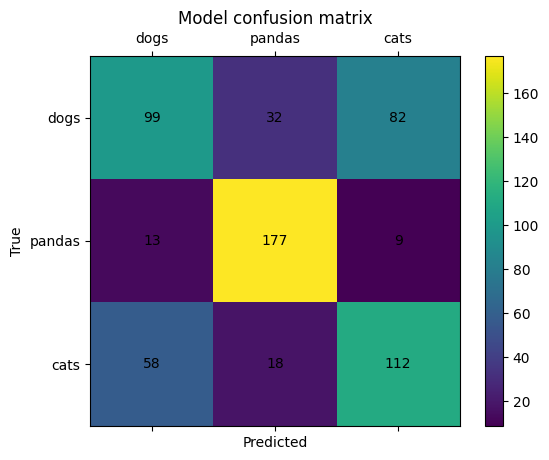

Accuracy : 64.67%


In [25]:
pred = clf.predict(testX)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

### ```Applying Simple KNN without Optimization First```

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=3)

In [27]:
testX.shape

(600, 5280)

In [28]:
resultk = neigh.predict(testX)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\1543534059.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\1543534059.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


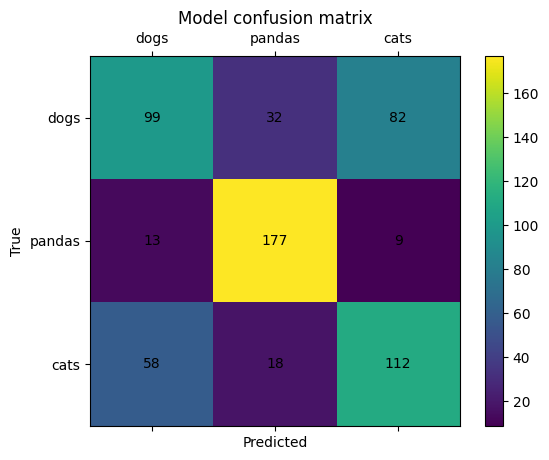

Accuracy : 64.67%


In [29]:
cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

# **Applying Feature Extractor Algorithms**

### ```NOTE: Traditional Machine Learning Algorithm Requires Equal number of features for each Input```

## **1) Feature Extractor: HOG**

- HOG provides equal number of Features

### ```Applying HOG Feature Extractor```

In [30]:
trainX = trainX.reshape(trainX.shape[0],32, 55, 3)
testX = testX.reshape(testX.shape[0],32, 55, 3)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400,)
(600,)


In [31]:
ppc = 16
hog_images = []
hog_features = []
for image in trainX:
    image = rgb2gray(image)
    # fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
    #                     cells_per_block=(1, 1), visualize=True, multichannel=False)

    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
    hog_features.append(fd)

In [32]:
train_hog=np.array(hog_features)
print(train_hog.shape)

(2400, 48)


## **Model Implementation After HOG Feature Extractor**

### ```SVM with HOGG```

In [33]:
from sklearn import svm
clf = svm.NuSVC()
clf.fit(train_hog, trainY)

NuSVC()

In [34]:
ppc = 16
hog_images = []
hog_features_t = []
for image in testX:
    image = rgb2gray(image)
    # fd_test, hog_image_test = hog(image, orientations=8, pixels_per_cell=(16, 16),
    #                     cells_per_block=(1, 1), visualize=True, multichannel=False)
    fd_test, hog_image_test = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
    hog_features_t.append(fd_test)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2565705288.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2565705288.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


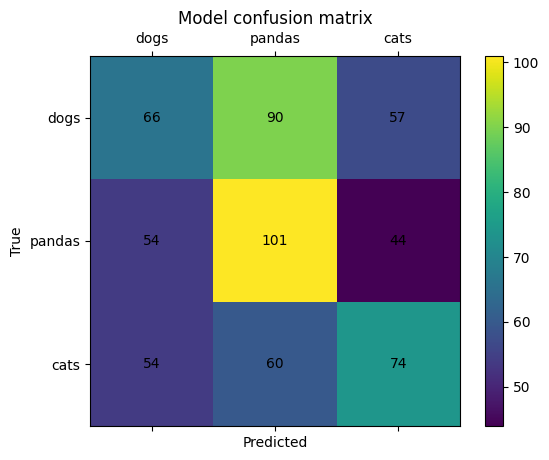

Accuracy : 40.17%


In [35]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = clf.predict(hog_features_t)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

### ```KNN with HOG```

In [36]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_hog, trainY)

KNeighborsClassifier(n_neighbors=3)

In [37]:
resultk = neigh.predict(hog_features_t)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\793132367.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\793132367.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


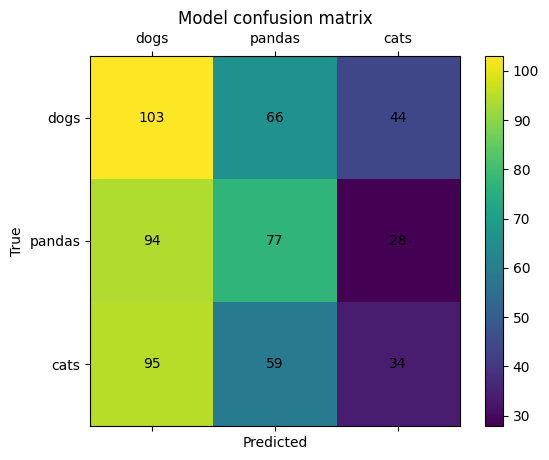

Accuracy : 35.67%


In [38]:
cm = confusion_matrix(testY, resultk)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, resultk)
print("Accuracy : %.2f%%" % (accuracy*100.0))

## **2) ORB Feature Extractor**

### ```Applying ORB on one Image```

(374, 500) uint8


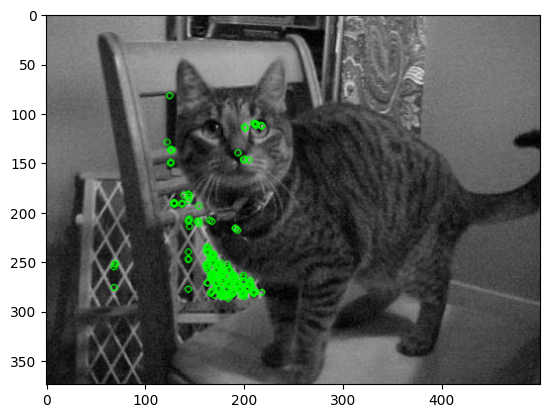

(<matplotlib.image.AxesImage at 0x1ab7c629e40>, None)

In [39]:
img = cv2.imread('animals/cats/cats_00001.jpg',0)
print(img.shape, img.dtype)
# Initiate ORB detector
orb = cv2.ORB_create(nfeatures=200)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [40]:
des

array([[ 24, 102, 175, ..., 126,  21, 250],
       [227, 221, 116, ..., 217,  68,  60],
       [106, 211, 195, ...,  92, 228, 216],
       ...,
       [ 36, 203, 214, ..., 154, 232, 140],
       [  1, 182, 177, ..., 192, 131, 153],
       [242, 141,  66, ..., 137, 112,   2]], dtype=uint8)

In [41]:
#ORB usually works with single channel (Gray scale) also it doesnt work with float64 types

### ```For Complete Data```

In [42]:
# initialize the data and labels
imagePaths = []

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

In [43]:
random.shuffle(imagePaths)
print(imagePaths[:10])

[['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/dogs/dogs_00519.jpg', 0], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00948.jpg', 2], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00336.jpg', 2], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/pandas/panda_00528.jpg', 1], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/dogs/dogs_00155.jpg', 0], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/dogs/dogs_00570.jpg', 0], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/pandas/panda_00397.jpg', 1], ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00529.jpg', 2], ['e:\\Pro

In [44]:
# ORB WONT WORK WHEN WE RESIZE IMAGE to small height and width: Until now the only way I found to avoid this error is to check the width and height of 
# the image you want to retrieve make the size a bit bigger.

In [45]:
WIDTH = 256
HEIGHT = 256
data = []
labels = []
descriptors_train = []
orb = cv2.ORB_create(nfeatures=200)
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0], 0)
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    kp = orb.detect(image,None)
    kp, des = orb.compute(image, kp)
    data.append(image)
    des = np.ravel(des)
    descriptors_train.append(des)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

### ```ORB Gives variable features for i.e each image when passed to ORB, the extracted features might not be same infact variable. So, traditional ML models would not work on variable features but Nueral Nets can like CNN. So to coop this issue we can use two strategies```

In [46]:
descriptors_train

[array([247,  96,  67, ..., 202, 196, 117], dtype=uint8),
 array([160, 212,  60, ...,  72, 215, 250], dtype=uint8),
 array([212,  32, 188, ..., 242, 194, 251], dtype=uint8),
 array([  3, 133,  15, ..., 192, 169, 143], dtype=uint8),
 array([224,  58, 218, ...,  62,  74, 142], dtype=uint8),
 array([ 97, 111, 107, ..., 147,  33,  33], dtype=uint8),
 array([143,  72,  46, ..., 241,  86, 177], dtype=uint8),
 array([125, 239,  72, ..., 243, 243, 241], dtype=uint8),
 array([146,  76,  62, ..., 138,  33, 185], dtype=uint8),
 array([189,  70,  74, ...,  68, 175, 143], dtype=uint8),
 array([ 95, 181, 109, ..., 140,  90, 221], dtype=uint8),
 array([211, 150, 253, ...,  12, 246, 223], dtype=uint8),
 array([220,  52, 254, ...,  51,  67,  49], dtype=uint8),
 array([223,  35, 111, ...,  18, 172,  10], dtype=uint8),
 array([ 34,  58, 241, ..., 241, 203, 165], dtype=uint8),
 array([220,  86,  95, ..., 203, 198, 162], dtype=uint8),
 array([176,  75, 117, ..., 221, 118, 237], dtype=uint8),
 array([228, 1

In [47]:
descriptors_train[0].shape

(5696,)

In [48]:
descriptors_train[1].shape

(5888,)

In [49]:
(trainX, testX, trainY, testY) = train_test_split(descriptors_train, labels, test_size=0.2, random_state=42)

In [50]:
trainX[0]

array([153,  12, 228, ..., 113, 213, 122], dtype=uint8)

## ```Approach # 1 For Handling Different number of features in feature vectors```

### ```For Train Features```

In [51]:
# ORB will give different number of features for different images so to co op that I can use two techniques

In [52]:
a = []
b = []
for i in trainX:
    a.append(len(i))
max_val_index_train = a.index(max(a))
for i in testX:
    b.append(len(i))
max_val_index_test = b.index(max(b))

In [53]:
print(max_val_index_train)
print(max_val_index_test)

1257
453


In [54]:
# Lenght of the max feature vector
max_vector_len_train = a[max_val_index_train]
max_vector_len_test = b[max_val_index_test]
print(max_vector_len_train)
print(max_vector_len_test)

6240
6240


In [55]:
if (max_vector_len_train < max_vector_len_test):
    max_vector_len = max_vector_len_test
elif(max_vector_len_train > max_vector_len_test):
    max_vector_len = max_vector_len_train
else:
    max_vector_len = max_vector_len_train

In [56]:
max_vector_len

6240

In [57]:
# Adding Padding with respect to largest feature vector
trainX_with_padding = []
testX_with_padding = []
for i in trainX:
    trainX_with_padding.append(i)
for i in testX:
    testX_with_padding.append(i)

In [58]:
print(len(trainX_with_padding))
print(len(testX_with_padding))

2400
600


In [59]:
# Appending 0 after converting to list then Np array FOR TRAINING
for i in range(len(trainX_with_padding)):
    if (len(trainX_with_padding[i]) != max_vector_len):
        b = list(trainX_with_padding[i])
        for j in range(max_vector_len - len(trainX_with_padding[i])):
            b.append(0)
        b = np.array(b)
        b.astype(int)
        b.astype(np.uint8)
        trainX_with_padding[i] = b
    else:
        pass

In [60]:
trainX_with_padding[2].shape

(6240,)

In [61]:
trainX_with_padding = np.array(trainX_with_padding)
labels = np.array(labels)

### ```For Test Features```

In [62]:
for i in range(len(testX_with_padding)):
    if (len(testX_with_padding[i]) != max_vector_len):
        b = list(testX_with_padding[i])
        for j in range(max_vector_len - len(testX_with_padding[i])):
            b.append(0)
        b = np.array(b)
        b.astype(int)
        b.astype(np.uint8)
        testX_with_padding[i] = b
    else:
        pass

In [63]:
testX_with_padding = np.array(testX_with_padding)

In [64]:
# # Note that float images are restricted to the range 0 to 1 even though the data type itself can exceed this range; all integer dtypes, on the other hand, have pixel intensities that can span the entire data type range.
# # scale the raw pixel intensities to the range [0, 1]
# # data = np.array(data, dtype="float") / 255.0
# descriptors_train = np.array(descriptors_train)
# data = np.array(data)
# labels = np.array(labels)

## **Model Implementation After ORB Feature Extractor with Approach 1**

### ```SVM Using ORB Feature Extractor```

In [65]:
# Verifying if every feature vector is of same len
m = []
for i in trainX_with_padding:
    m.append(len(i))

print(min(m))
print(max(m))

6240
6240


In [66]:
trainY = np.array(trainY)

In [67]:
from sklearn import svm
clf = svm.NuSVC()
clf.fit(trainX_with_padding, trainY)

NuSVC()

In [68]:
testY = np.array(testY)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


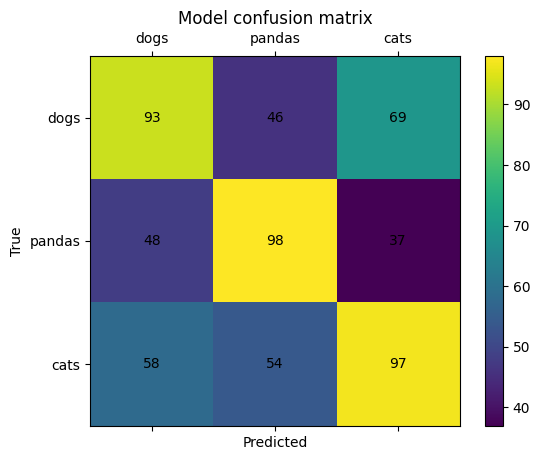

Accuracy : 48.00%


In [69]:
pred = clf.predict(testX_with_padding)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

### ```KNN Using ORB Feature Extractor```

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX_with_padding, trainY)

KNeighborsClassifier(n_neighbors=3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\3586023879.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\3586023879.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


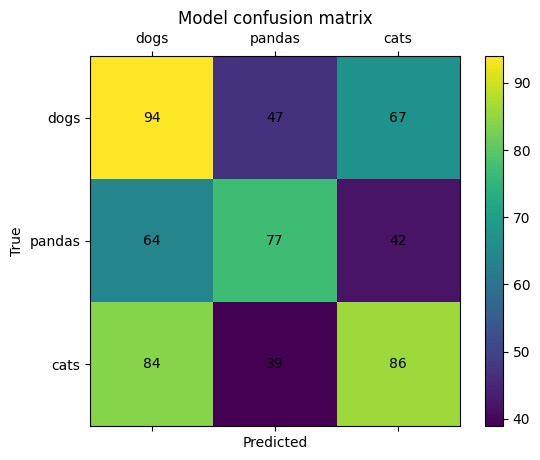

Accuracy : 42.83%


In [71]:
pred = neigh.predict(testX_with_padding)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

### ```MLP (Multilayer Perceptron Neural Network)```

In [72]:
trainY = np.array(trainY)

In [73]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(trainX_with_padding, trainY)

In [74]:
testY = np.array(testY)

In [75]:
pred_proba = clf.predict_proba(testX_with_padding)

In [76]:
# RESULTS
pred_proba

array([[0.32939706, 0.32891038, 0.34169256],
       [0.32939706, 0.32891038, 0.34169256],
       [0.32939706, 0.32891038, 0.34169256],
       ...,
       [0.32939706, 0.32891038, 0.34169256],
       [0.32939706, 0.32891038, 0.34169256],
       [0.32939706, 0.32891038, 0.34169256]])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


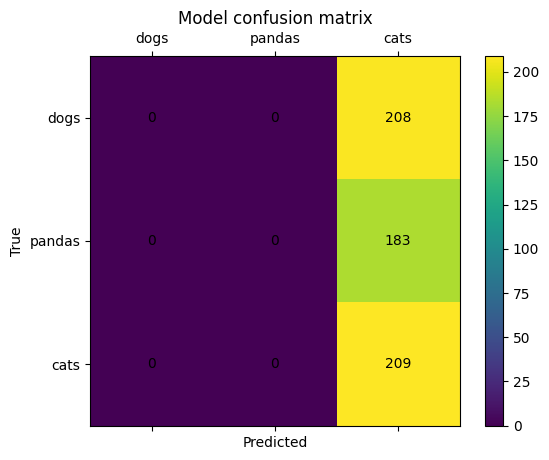

Accuracy : 34.83%


In [77]:
pred = clf.predict(testX_with_padding)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

## ```Approach 2 Using BAG OF VISUAL WORDS```

In [78]:
imagePaths[:5]

[['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/dogs/dogs_00519.jpg',
  0],
 ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00948.jpg',
  2],
 ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/cats/cats_00336.jpg',
  2],
 ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/pandas/panda_00528.jpg',
  1],
 ['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/dogs/dogs_00155.jpg',
  0]]

In [79]:
allFeatures=[]

for filename in imagePaths:
    img = cv2.imread(filename[0])
    img1 = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA) # interpolation: Interpolation is the way the extra pixels in the new image is calculated. If the original image is smaller, then a larger rescaled image has extra pixels which is not exactly the same as a nearby pixels. The value of the extra pixel depends on the technique used.
    # mask = np.zeros(img1.shape[:2],np.uint8)
    # bgdModel = np.zeros((1,65),np.float64)
    # fgdModel = np.zeros((1,65),np.float64)
    # rect = (5,5,235,235) # It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
    # cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT) # Foreground Extraction
    # mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    # img1 = img1*mask2[:,:,np.newaxis]
    # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    # #img1= cv2.GaussianBlur(img1,(5,5),cv2.BORDER_DEFAULT)
    # ll=cv2.equalizeHist(img1)
    orb = cv2.ORB_create(nfeatures=200)
    keypoints, descriptors = orb.detectAndCompute(img1, None)
    allFeatures.append(descriptors)#array[ImageNb][FeatureNb]

In [80]:
bowfeatures = copy.deepcopy(allFeatures)

In [81]:
subL = []
for i in bowfeatures:
    subL.append(i)

In [82]:
import itertools
flat_list = list(itertools.chain(*subL)) # FOR FLATTENING

In [83]:
len(flat_list)

545326

In [84]:
# allFeatures=[]

# for filename in imagePaths:
#     img = cv2.imread(filename[0])
#     img1 = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA) # interpolation: Interpolation is the way the extra pixels in the new image is calculated. If the original image is smaller, then a larger rescaled image has extra pixels which is not exactly the same as a nearby pixels. The value of the extra pixel depends on the technique used.
#     orb = cv2.ORB_create(nfeatures=200)
#     keypoints, descriptors = orb.detectAndCompute(img1, None)
#     allFeatures.append(descriptors)#array[ImageNb][FeatureNb]

# # Same number of clusters as number of features in orb
# kmeans = KMeans(n_clusters = 200, n_init=10, init='random')
# kmeans.fit(flat_list)#vocabulary

# documentsPerFeature=[0] * 200

# alla=[]
# for i in allFeatures:
#     clusters=[]
#     for u in i:
#         cluster=kmeans.predict([u])  
#         clusters.append(cluster[0])
        
#     nums=pd.Series(clusters).value_counts()
#     tf=nums.apply(lambda a:a/nums.sum())
#     alla.append(tf.to_dict())
# #tf for each feature in the document

# for i in alla:
#     for k in i:
#         documentsPerFeature[k-1]=documentsPerFeature[k-1]+1
# #number of documents containing a given feature

# import math as m
# fr= pd.DataFrame(columns= range(1,201))
# for i in alla:
#     row=[0]*200
#     totalWords=0
#     for k in i:
#         idf=m.log(len(alla)/documentsPerFeature[k-1])
#         res=i[k]*idf
#         row[k]=res
#     fr=fr.append(pd.Series(row, range(1,201)),ignore_index=True )  
# fr       

In [85]:
# Same number of clusters as number of features in orb
kmeans = KMeans(n_clusters = 200, n_init=10, init='random')
kmeans.fit(flat_list)#vocabulary

KMeans(init='random', n_clusters=200, n_init=10)

In [86]:
documentsPerFeature=[0] * 200

alla=[]
for i in allFeatures:
    clusters=[]
    for u in i:
        cluster=kmeans.predict([u])  
        clusters.append(cluster[0])
        
    nums=pd.Series(clusters).value_counts()
    tf=nums.apply(lambda a:a/nums.sum())
    alla.append(tf.to_dict())
#tf for each feature in the document

for i in alla:
    for k in i:
        documentsPerFeature[k-1]=documentsPerFeature[k-1]+1
#number of documents containing a given feature

In [87]:
import math as m
fr= pd.DataFrame(columns= range(1,201))
for i in alla:
    row=[0]*200
    totalWords=0
    for k in i:
        idf=m.log(len(alla)/documentsPerFeature[k-1])
        res=i[k]*idf
        row[k]=res
    fr=fr._append(pd.Series(row, range(1,201)),ignore_index=True)  
fr       

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\3241959204.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fr=fr._append(pd.Series(row, range(1,201)),ignore_index=True)


,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.004218,0.000000,0.008628,0.000000,0.000000,0.000000,0.000000,0.013968,0.004049,0.000000,...,0.000000,0.000000,0.008483,0.000000,0.000000,0.008734,0.013089,0.000000,0.004030,0.009573
1,0.004056,0.000000,0.000000,0.000000,0.003531,0.004420,0.007302,0.000000,0.000000,0.000000,...,0.003097,0.000000,0.004079,0.000000,0.000000,0.000000,0.000000,0.003932,0.000000,0.000000
2,0.013023,0.005018,0.000000,0.000000,0.003779,0.000000,0.000000,0.004792,0.004168,0.004370,...,0.013259,0.008296,0.004366,0.000000,0.004022,0.000000,0.000000,0.000000,0.000000,0.004926
3,0.000000,0.004793,0.000000,0.007087,0.000000,0.004519,0.003733,0.000000,0.000000,0.000000,...,0.000000,0.003962,0.000000,0.012059,0.003843,0.000000,0.004290,0.004020,0.011887,0.000000
4,0.003887,0.004492,0.000000,0.009962,0.016918,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002968,0.000000,0.003909,0.000000,0.018006,0.000000,0.004020,0.000000,0.003713,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.004170,0.000000,0.000000,0.003563,0.007261,0.004545,0.000000,0.000000,0.008008,0.004198,...,0.003184,0.000000,0.000000,0.004042,0.003864,0.000000,0.008628,0.008084,0.007969,0.000000
2996,0.007814,0.000000,0.003996,0.000000,0.006803,0.004258,0.000000,0.000000,0.000000,0.003933,...,0.000000,0.011199,0.000000,0.000000,0.000000,0.012136,0.000000,0.000000,0.011199,0.004434
2997,0.008248,0.000000,0.004218,0.003524,0.000000,0.000000,0.003712,0.009105,0.007919,0.012454,...,0.003149,0.003940,0.000000,0.007994,0.003821,0.004270,0.004266,0.000000,0.003940,0.028081
2998,0.012236,0.014143,0.004172,0.006970,0.000000,0.000000,0.011013,0.009005,0.003916,0.004106,...,0.000000,0.003897,0.000000,0.003953,0.003779,0.004223,0.004219,0.000000,0.007794,0.018515


In [88]:
Train = fr[:2700]

In [89]:
labels = []
for filename in imagePaths:
    labels.append(filename[1])

In [90]:
LabelTrain = labels[:2700]

In [91]:
LabelTrain = np.array(LabelTrain)

## **Model Implementation After ORB Feature Extractor with Approach 2**

### ```SVM Using ORB Feature Extractor```

In [92]:
from sklearn import svm
clf = svm.NuSVC()
clf.fit(Train, LabelTrain)

NuSVC()

In [93]:
Test = fr[2700:]

In [94]:
LabelTest = labels[2700:]

In [95]:
LabelTest = np.array(LabelTest)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\3136197037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\3136197037.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


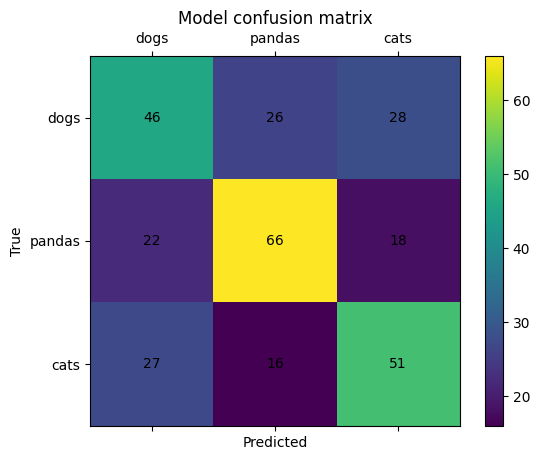

Accuracy : 54.33%


In [96]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score
pred = clf.predict(Test)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(LabelTest, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(LabelTest, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

## **SIFT Feature Extraction**

### ```On a single Image```

In [97]:
# pip install opencv-python==3.3.0.10 

# pip install opencv-contrib-python==3.3.0.10

In [98]:
# reading the image
img = cv2.imread('animals/cats/cats_00001.jpg', 0)
img1 = cv2.imread('animals/cats/cats_00001.jpg', 0)
# convert to greyscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [99]:
# create SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()

In [100]:
# detect features from the image
keypoints, descriptors = sift.detectAndCompute(img1, None)

In [101]:
descriptors = np.ravel(descriptors)

In [102]:
descriptors

array([ 0.,  0., 10., ...,  0.,  0.,  5.], dtype=float32)

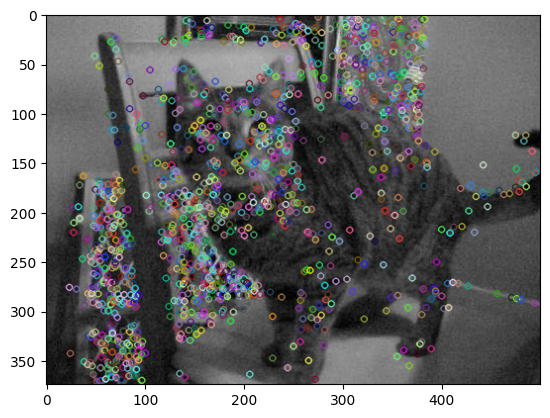

In [103]:
# draw the detected key points
sift_image = cv2.drawKeypoints(img, keypoints, img1)
plt.imshow(sift_image)

### ```For Complete Data```

In [104]:
# initialize the data and labels
data = []
labels = []
imagePaths = []

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

In [105]:
random.shuffle(imagePaths)
print(imagePaths[0])

['e:\\Projects\\AI-ML\\Vision\\Animal Classification Before and After Feature Extraction/animals/dogs/dogs_00950.jpg', 0]


In [106]:
WIDTH = 256
HEIGHT = 256
data = []
labels = []
descriptors_train = []
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0], 0)
    image = cv2.resize(image, (WIDTH, HEIGHT))  
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(image, None)
    data.append(image)
    des = np.ravel(des)
    descriptors_train.append(des)
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [107]:
descriptors_train[0]

array([ 55., 136.,  10., ...,   0.,   0.,   0.], dtype=float32)

In [108]:
# descriptors_train = np.array(descriptors_train)
# data = np.array(data)
# labels = np.array(labels)

In [109]:
(trainX, testX, trainY, testY) = train_test_split(descriptors_train, labels, test_size=0.2, random_state=42)

In [110]:
trainX[0]

array([93.,  0.,  0., ..., 80.,  2.,  1.], dtype=float32)

## ```Approach # 1 For Handling Different number of features in feature vectors```

### ```For Train Features```

In [111]:
# SIFT will give different number of features for different images so to co op that I can use two techniques

In [112]:
a = []
b = []
for i in trainX:
    a.append(len(i))
max_val_index_train = a.index(max(a))
for i in testX:
    b.append(len(i))
max_val_index_test = b.index(max(b))

In [113]:
print(max_val_index_train)
print(max_val_index_test)

792
437


In [114]:
# Lenght of the max feature vector
max_vector_len_train = a[max_val_index_train]
max_vector_len_test = b[max_val_index_test]
print(max_vector_len_train)
print(max_vector_len_test)

202496
390912


In [115]:
if (max_vector_len_train < max_vector_len_test):
    max_vector_len = max_vector_len_test
elif(max_vector_len_train > max_vector_len_test):
    max_vector_len = max_vector_len_train

In [116]:
# Adding Padding with respect to largest feature vector
trainX_with_padding = []
testX_with_padding = []
for i in trainX:
    trainX_with_padding.append(i)
for i in testX:
    testX_with_padding.append(i)

In [117]:
trainX_with_padding[0]

array([93.,  0.,  0., ..., 80.,  2.,  1.], dtype=float32)

In [118]:
print(len(trainX_with_padding))
print(len(testX_with_padding))

2400
600


In [119]:
# Appending 0 after converting to list then Np array FOR TRAINING
for i in range(len(trainX_with_padding)):
    if (len(trainX_with_padding[i]) != max_vector_len):
        b = list(trainX_with_padding[i])
        for j in range(max_vector_len - len(trainX_with_padding[i])):
            b.append(0)
        b = np.array(b)
        b.astype(np.float32)
        trainX_with_padding[i] = b
    else:
        pass

In [120]:
trainX_with_padding[:3]

[array([93.,  0.,  0., ...,  0.,  0.,  0.]),
 array([128.,   3.,   0., ...,   0.,   0.,   0.]),
 array([0., 0., 0., ..., 0., 0., 0.])]

In [121]:
trainX_with_padding[2].shape

(390912,)

In [122]:
trainX_with_padding = np.array(trainX_with_padding)
labels = np.array(labels)

### ```For Test Features```

In [123]:
for i in range(len(testX_with_padding)):
    if (len(testX_with_padding[i]) != max_vector_len):
        b = list(testX_with_padding[i])
        for j in range(max_vector_len - len(testX_with_padding[i])):
            b.append(0)
        b = np.array(b)
        b.astype(int)
        b.astype(np.uint8)
        testX_with_padding[i] = b
    else:
        pass

In [124]:
testX_with_padding = np.array(testX_with_padding)

In [125]:
# # Note that float images are restricted to the range 0 to 1 even though the data type itself can exceed this range; all integer dtypes, on the other hand, have pixel intensities that can span the entire data type range.
# # scale the raw pixel intensities to the range [0, 1]
# # data = np.array(data, dtype="float") / 255.0
# descriptors_train = np.array(descriptors_train)
# data = np.array(data)
# labels = np.array(labels)

## **Model Implementation after SIFT**

### ```SVM Using SIFT Feature Extractor```

In [126]:
# Verifying if every feature vector is of same len
m = []
for i in trainX_with_padding:
    m.append(len(i))

print(min(m))
print(max(m))

390912
390912


In [127]:
trainY = np.array(trainY)

In [128]:
from sklearn import svm
clf = svm.NuSVC()
clf.fit(trainX_with_padding, trainY)

NuSVC()

In [129]:
testY = np.array(testY)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


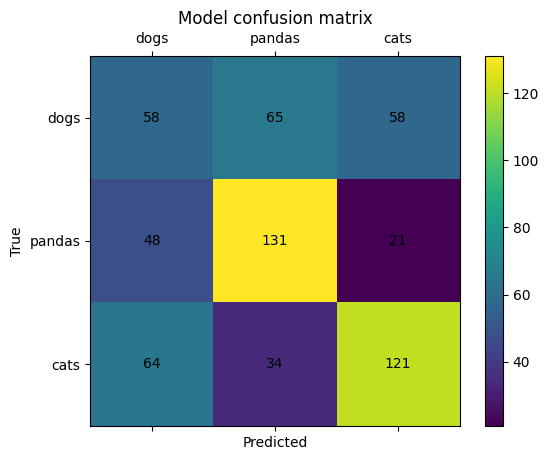

Accuracy : 51.67%


In [130]:
pred = clf.predict(testX_with_padding)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

### ```KNN Using SIFT Feature Extractor```

In [131]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX_with_padding, trainY)

KNeighborsClassifier(n_neighbors=3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\3586023879.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\3586023879.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


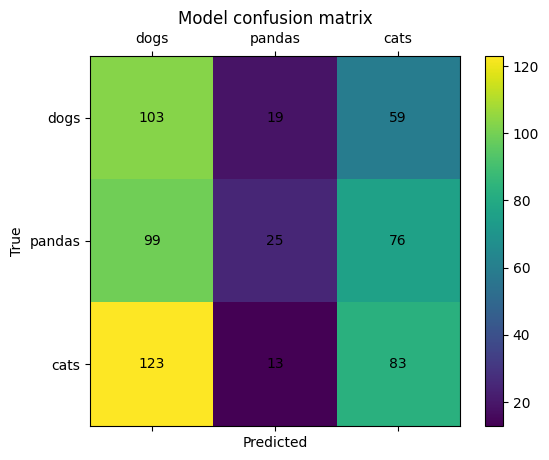

Accuracy : 35.17%


In [132]:
pred = neigh.predict(testX_with_padding)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

### ```MLP (Multilayer Perceptron Neural Network) Using SIFT Feature Extractor```

In [133]:
trainY = np.array(trainY)

In [134]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(trainX_with_padding, trainY)

In [135]:
testY = np.array(testY)

In [136]:
pred_proba = clf.predict_proba(testX_with_padding)

In [137]:
pred_proba

array([[0.35079289, 0.32407631, 0.3251308 ],
       [0.35079289, 0.32407631, 0.3251308 ],
       [0.35079289, 0.32407631, 0.3251308 ],
       ...,
       [0.35079289, 0.32407631, 0.3251308 ],
       [0.35079289, 0.32407631, 0.3251308 ],
       [0.35079289, 0.32407631, 0.3251308 ]])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19060\2000545324.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


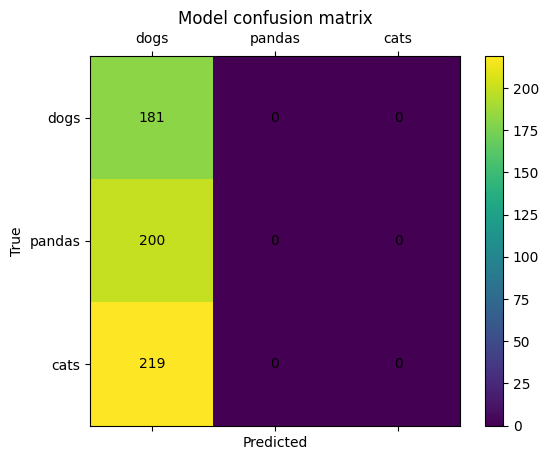

Accuracy : 30.17%


In [138]:
pred = clf.predict(testX_with_padding)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

## **IN ORDER TO USE SURF WHICH IS STILL PATENTED, MUST NEED TO BUY OTHERWISE COMPILE THE OLDER VERSION FROM SOURCE.**

In [139]:
#error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: 
#error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; 
#Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'